In [ ]:
### Overview
* this notebooks script reads a cleaned set of Swahili questions from Kenyan farmers,  
processes to create bi-, tri-, and quad-grams for translation in  

### Inputs: (files are in working directory)
* CSV files of cleaned / lower case /  punctuation removed questions: 'kenya_swa_q_clean.csv'  
* CSV file of Swahili verb prefixes, sliced from [verb conjugation dataset-Menderley](https://data.mendeley.com/datasets/rvt89578g5/1): 'swa_prefix.csv'
* CSV file of [Swahili stop words-Menderly](https://data.mendeley.com/datasets/mmf4hnsm2n/1): 'Common Swahili Stop-words.csv'

### Output files (in working directory)
* CSV file of tokens:  'ken_swa_tokens.csv'
* CSV file of top 500 bigrams: 'ken_swa_bigrams_top500.csv'
* CSV file of top 500 trigrams:  'ken_swa_trigrams_top500.csv'
* CSV file of top 500 quadgrams:  'ken_swa_quadgrams_top500.csv' 
* PNG plot of top 20 bigrams:  'top20bigrams_ken_swa.png'
* PNG plot of top 20 trigrams: 'top20trigrams_end_swa.png'
* PNG plot of top 20 quadgrams: top20quadgrams_ken_swa.png'

### Steps:
1. Remove stopwords
2. Convert / normalize **plural** to singular nouns
3. Strip verb prefixes to obtain verb root
4. Strip noun prefixes for most common noun classes for agriculture: 1,2,3,4,5,6 (most 9,10 noun classes don't have prefixes)
5. Strip numbers
6. Tokenize
7. Create bigrams, trigrams and quadgrams in swahili, saves as csv files
8. Plot frequency distribution of swahili bigrams, trigrams, and quadgrams

In [5]:
#import packages:  pandas, numpy,nltk, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from collections import Counter

import re


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\liulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
#load processed country question file
q_df = pd.read_csv('kenya_swa_q_clean.csv')
q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590498 entries, 0 to 590497
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      590498 non-null  int64 
 1   question_id     590498 non-null  int64 
 2   question_topic  443528 non-null  object
 3   question_clean  590497 non-null  object
dtypes: int64(2), object(2)
memory usage: 18.0+ MB


In [13]:
#create list of questions:  
ken_q_list=list(q_df['question_clean'])
ken_q_list[0:5]

['dawa ya viroboto kwa kuku',
 ' niko na punda  anakohoa ni dawa gany naexa mpea na ako karibu kuzaa',
 'ngombe aina kani itoayo maziwa  lita kwa siku ',
 'niko na watu kumi hapa busia kwa sasa wanauliza je mtakuja kuwaeleza kiundani  ',
 '     dawa  ya  vifaranga   ya  kwanzia   siku   moja   ni  gani  na  bei   gani']

In [7]:
#load stopwords & verb prefix file, convert to lists
stopwords_df = pd.read_csv('Common Swahili Stop-words.csv')
swa_stopwords=list(stopwords_df['StopWords'])

prefix_df = pd.read_csv('swa_prefix.csv')
swa_verb_pref=list(prefix_df['prefix'])


In [8]:
#create plural to singular dictionary
plural_to_singular = {
    "wa": "m",      # watu -> mtu
    "ma": "",       # magari -> gari
    "ya": "",
    "vi": "ki",     # vitabu -> kitabu
    "mi": "m",      # miti -> mti
    }

In [9]:
#define function: replacing plural with singular prefix
def normalize_noun(token):
    for plural, singular in plural_to_singular.items():
        if token.startswith(plural) and len(token) > len(plural):
            return singular + token[len(plural):]
    return token

In [10]:
#define function:  strip verb prefixes, leave verb root
def strip_verb_prefix(token):
    # Remove longest prefix first
    for pre in sorted(swa_verb_pref, key=len, reverse=True):
        if token.startswith(pre) and len(token) > len(pre):
            return token[len(pre):]
    return token


In [11]:
#define function to clean and tokenize phrase / question:
def process_question(text):
    # Tokenize with NLTK
    tokens = nltk.word_tokenize(text)

    cleaned = []
    for tok in tokens:
        if tok in swa_stopwords:     # remove stopwords
            continue
        #if bool(re.search(r'\d', tok)):       #remove numbers
        #    continue
        tok = normalize_noun(tok)   # plural → singular
        tok = strip_verb_prefix(tok)
        cleaned.append(tok)

    return cleaned

In [14]:
#process questions and output list of tokens
print("original # of questions: ", len(ken_q_list))
token_list = []

for string in ken_q_list:
    token = process_question(str(string))
    token_list.append(token)
    
print("tokenized # of elements: ", len(token_list))

original # of questions:  590498
tokenized # of elements:  590498


In [ ]:
#write token_list to csv file: 
#token_list[0:10]

In [24]:
#create list of bigrams:
all_bigrams = []

for question in token_list:
    #create bigrams iterator for each element of tokens: 
    bigram_iterator = bigrams(question)
    bigram_list = list(bigram_iterator)

    # Add the bigrams of the current question to the overall list
    all_bigrams.extend(bigram_list)

In [27]:
#create list of trigrams, if # tokens >= 3
all_trigrams = []

for question in token_list:
    if len(question) < 3:
        continue
            #create bigrams iterator for each element of tokens: 
    else:
        all_trigrams.extend(list(trigrams(question)))


In [ ]:
print("# of trigrams: ", len(all_trigrams))
print(all_trigrams[0:5])
type(all_trigrams)

In [ ]:
print("# of bigrams: ", len(all_bigrams))
print(all_bigrams[0:5])
type(all_bigrams)

In [25]:
bigram_freq = Counter(all_bigrams)
#type(bigram_freq)

In [28]:
trigram_freq = Counter(all_trigrams)
#type(trigram_freq)

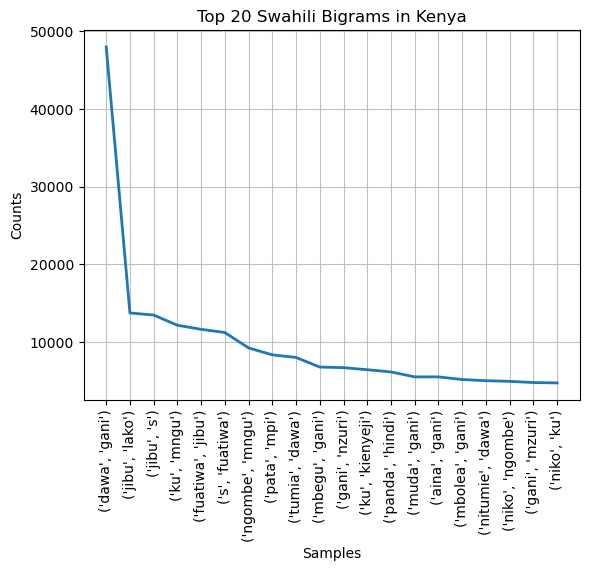

In [31]:
#plot frequency distribution of bigrams
fdist = FreqDist(all_bigrams)
top_n = 20   # change to desired number
fdist.plot(top_n, title=f"Top {top_n} Swahili Bigrams in Kenya")
plt.savefig("top20bigrams_ken_swa.png")

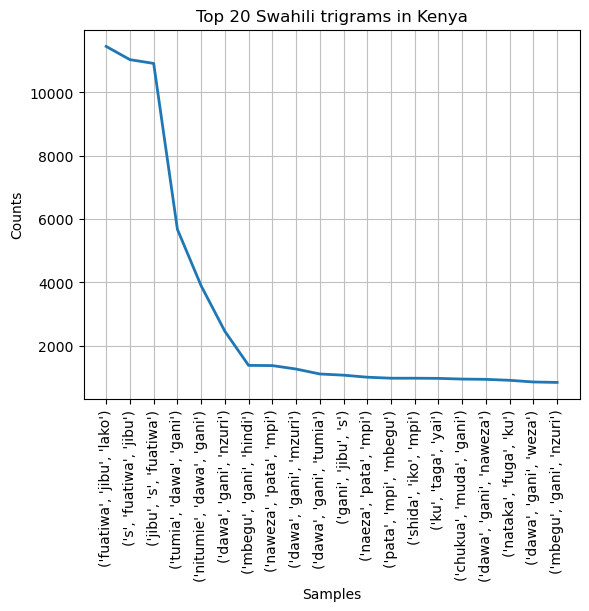

In [30]:
#plot frequency distribution of trigrams
fdist = FreqDist(all_trigrams)
top_n = 20   # change to desired number
fdist.plot(top_n, title=f"Top {top_n} Swahili trigrams in Kenya")
plt.savefig("top20trigrams_ken_swa.png")

In [ ]:
#find top 500 bigrams:
top_500 = bigram_freq.most_common(500)
#convert top_500 list to df, and join bigrams with '_' as separators for later translation, note: there are no duplicates
ken_bigrams_500_df = pd.DataFrame(top_500, columns=['bigram','count'])
ken_bigrams_500_df["bigram_str"] = ken_bigrams_500_df["bigram"].apply(lambda t: "_".join(t))

In [ ]:
#convert top_500 list to df, and join bigrams with '_' as separators for later translation, note: there are no duplicates
ken_bigrams_500_df = pd.DataFrame(top_500, columns=['bigram','count'])
ken_bigrams_500_df["bigram_str"] = ken_bigrams_500_df["bigram"].apply(lambda t: "_".join(t))
ken_bigrams_500_df.head()

In [ ]:
#save in csv file:
ken_bigrams_500_df.to_csv('ken_swa_bigrams_top500.csv')


In [ ]:
#find top 500 trigrams:
top_500 = trigram_freq.most_common(500)
#convert top_500 list to df, and join trigrams with '_' as separators for later translation, note: there are no duplicates
ken_trigrams_500_df = pd.DataFrame(top_500, columns=['trigram','count'])
ken_trigrams_500_df["trigram_str"] = ken_trigrams_500_df["trigram"].apply(lambda t: "_".join(t))
ken_trigrams_500_df.head()

In [ ]:
#save in csv file:
ken_trigrams_500_df.to_csv('ken_swa_trigrams_top500.csv')


In [ ]:
#for future reading:
ken_bigrams_500_df = pd.read_csv('ken_swa_bigrams_top500.csv')

In [ ]:
# num of characters in bigrams & trigrams for translation:  
total_characters = sum(len(s) for s in ken_bigrams_500_df['bigram_str'])
print("# characters in bigrams:", total_characters)
total_characters = sum(len(s) for s in ken_trigrams_500_df['trigram_str'])
print("# characters in trigrams:", total_characters)

In [ ]:
all_trigrams.extend(list(trigrams(question)))

In [15]:
#create list of quadgrams, after checking # tokens >= 4
from nltk.util import ngrams

all_quadgrams = []

for question in token_list:
    if len(question) < 4:
        continue
            #create bigrams iterator for each element of tokens: 
    else:
        all_quadgrams.extend(list(ngrams(question,4)))
        


In [16]:
print("# of quadgrams: ", len(all_quadgrams))


# of quadgrams:  2519188


In [17]:
quadgram_freq = Counter(all_quadgrams)

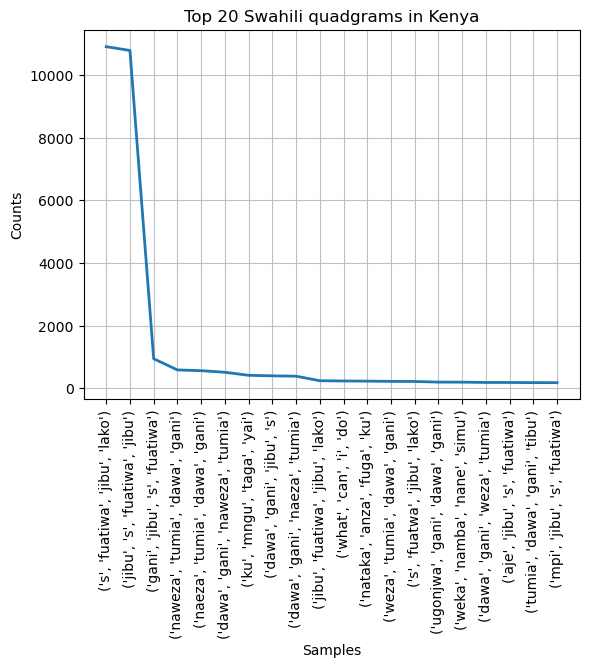

In [32]:
import matplotlib.pyplot as plt

fdist = FreqDist(all_quadgrams)
top_n = 20   # change to desired number
fdist.plot(top_n, title=f"Top {top_n} Swahili quadgrams in Kenya")
plt.savefig("top20quadgrams_ken_swa.png")

In [21]:
#find top 500 quadgrams:
top_500 = quadgram_freq.most_common(500)
#convert top_500 list to df, and join quadgrams with '_' as separators for later translation, note: there are no duplicates
ken_quadgrams_500_df = pd.DataFrame(top_500, columns=['quadgram','count'])
ken_quadgrams_500_df["quadgram_str"] = ken_quadgrams_500_df["quadgram"].apply(lambda t: "_".join(t))
#num of characters for translation:  
total_characters = sum(len(s) for s in ken_quadgrams_500_df['quadgram_str'])
print("# characters in quadgrams:", total_characters)

# characters in quadgrams: 10238


In [22]:
ken_quadgrams_500_df.columns

Index(['quadgram', 'count', 'quadgram_str'], dtype='object')

In [23]:
#save in csv file:
ken_quadgrams_500_df.to_csv('ken_swa_quadgrams_top500.csv')

In [ ]:
# save tokens - edit
#drop empty strings, write token_list to text file, using "" as separator
joined = [" ".join(tokens) for tokens in token_list]
joined_clean=list(filter(None,joined))
df = pd.DataFrame(joined_clean, columns=['token_string'])
df.to_csv('ken_swa_tokens.csv')